In [7]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians 
import time
start = time.time()
print("시작")

train = pd.read_csv("train.csv", parse_dates = ['pickup_datetime', 'dropoff_datetime'])
test = pd.read_csv("test.csv", parse_dates = ['pickup_datetime'])
weather = pd.read_csv("weather.csv", parse_dates = ['datetime'])  # 데이터 전처리한 파일
submission = pd.read_csv("sample_submission.csv")

# 날짜데이터 분할

train['pickup_year'] = train['pickup_datetime'].dt.year  
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_minute'] = train['pickup_datetime'].dt.minute
train['pickup_second'] = train['pickup_datetime'].dt.second
train["pickup_dayofweek"] = train["pickup_datetime"].dt.dayofweek 

test['pickup_year'] = test['pickup_datetime'].dt.year  
test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['pickup_minute'] = test['pickup_datetime'].dt.minute
test['pickup_second'] = test['pickup_datetime'].dt.second
test["pickup_dayofweek"] = test["pickup_datetime"].dt.dayofweek 

# 원핫인코딩

train['store_and_fwd_flag_Y'] = train['store_and_fwd_flag'] == 'Y'
train['store_and_fwd_flag_N'] = train['store_and_fwd_flag'] == 'N'

test['store_and_fwd_flag_Y'] = test['store_and_fwd_flag'] == 'Y'
test['store_and_fwd_flag_N'] = test['store_and_fwd_flag'] == 'N'


train['vendor_1'] = train['vendor_id'] == 1
train['vendor_2'] = train['vendor_id'] == 2

test['vendor_1'] = test['vendor_id'] == 1
test['vendor_2'] = test['vendor_id'] == 2


train['passenger_0'] = train['passenger_count'] == 0
train['passenger_1'] = train['passenger_count'] == 1
train['passenger_2'] = train['passenger_count'] == 2
train['passenger_3'] = train['passenger_count'] == 3
train['passenger_4'] = train['passenger_count'] == 4
train['passenger_5'] = train['passenger_count'] == 5
train['passenger_6'] = train['passenger_count'] == 6
train['passenger_7'] = train['passenger_count'] == 7
train['passenger_8'] = train['passenger_count'] == 8
train['passenger_9'] = train['passenger_count'] == 9

test['passenger_0'] = test['passenger_count'] == 0
test['passenger_1'] = test['passenger_count'] == 1
test['passenger_2'] = test['passenger_count'] == 2
test['passenger_3'] = test['passenger_count'] == 3
test['passenger_4'] = test['passenger_count'] == 4
test['passenger_5'] = test['passenger_count'] == 5
test['passenger_6'] = test['passenger_count'] == 6
test['passenger_7'] = test['passenger_count'] == 7
test['passenger_8'] = test['passenger_count'] == 8
test['passenger_9'] = test['passenger_count'] == 9

# 요일 원핫인코딩 추가

train["mon"] = train["pickup_dayofweek"] == 0
train["tue"] = train["pickup_dayofweek"] == 1
train["wed"] = train["pickup_dayofweek"] == 2
train["thu"] = train["pickup_dayofweek"] == 3
train["fri"] = train["pickup_dayofweek"] == 4
train["sat"] = train["pickup_dayofweek"] == 5
train["sun"] = train["pickup_dayofweek"] == 6

test["mon"] = test["pickup_dayofweek"] == 0
test["tue"] = test["pickup_dayofweek"] == 1
test["wed"] = test["pickup_dayofweek"] == 2
test["thu"] = test["pickup_dayofweek"] == 3
test["fri"] = test["pickup_dayofweek"] == 4
test["sat"] = test["pickup_dayofweek"] == 5
test["sun"] = test["pickup_dayofweek"] == 6

# 이동거리 추가(하버사인 + 맨하탄)

def haversine(train):
    lon1 = train['pickup_longitude']
    lat1 = train['pickup_latitude']
    lon2 = train['dropoff_longitude']
    lat2 = train['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    haversine_km = 6367 * c
    return haversine_km

def haversine(test):
    lon1 = test['pickup_longitude']
    lat1 = test['pickup_latitude']
    lon2 = test['dropoff_longitude']
    lat2 = test['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    haversine_km = 6367 * c
    return haversine_km

def manhattan_distance(train):
    lon1 = train['pickup_longitude']
    lat1 = train['pickup_latitude']
    lon2 = train['dropoff_longitude']
    lat2 = train['dropoff_latitude']
    manhattan_km = (abs(lon1 - lon2)*111) + (abs(lat1 - lat2)*85.397)
    return manhattan_km

def manhattan_distance(test):
    lon1 = test['pickup_longitude']
    lat1 = test['pickup_latitude']
    lon2 = test['dropoff_longitude']
    lat2 = test['dropoff_latitude']
    km = (abs(lon1 - lon2)*111) + (abs(lat1 - lat2)*85.397)
    return km

train['haversine_distance'] = train.apply(lambda train: haversine(train), axis=1)
test['haversine_distance'] = test.apply(lambda test: haversine(test), axis=1)
train['manhattan_distance'] = train.apply(lambda train: manhattan_distance(train), axis=1)
test['manhattan_distance'] = test.apply(lambda test: manhattan_distance(test), axis=1)


# 날씨데이터 추가

weather['year'] = weather['datetime'].dt.year  
weather['month'] = weather['datetime'].dt.month
weather['day'] = weather['datetime'].dt.day

weather = weather.rename(columns = {'year' : 'pickup_year', 'month' : 'pickup_month', 'day' : 'pickup_day'})

train = pd.merge(train, weather)
test = pd.merge(test, weather)


print("완료!")
print('Running Time : %.02f초' % (time.time() - start))


시작
완료!
Running Time : 197.05초


In [8]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,V_high,V_avg,V_low,W_high,W_avg,W_high.1,Precip. (mm),rain,snow,fog
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,16.0,9.0,3.0,45.0,23.0,64.0,7.37,1.0,0.0,0.0
1,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,...,16.0,9.0,3.0,45.0,23.0,64.0,7.37,1.0,0.0,0.0
2,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,...,16.0,9.0,3.0,45.0,23.0,64.0,7.37,1.0,0.0,0.0
3,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,...,16.0,9.0,3.0,45.0,23.0,64.0,7.37,1.0,0.0,0.0
4,id3817493,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,...,16.0,9.0,3.0,45.0,23.0,64.0,7.37,1.0,0.0,0.0


#### longitude(경도 - 동서기준)
#### latitude(위도 - 남북기준)

In [20]:
train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,3.438704e+00,4.544296e+00
std,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,4.293840e+00,6.052020e+00
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,0.000000e+00
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,1.231063e+00,1.573940e+00
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,2.092403e+00,2.671642e+00
75%,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,3.872904e+00,4.901046e+00
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.240130e+03,1.295660e+03


In [21]:
test[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,-73.973614,40.750927,-73.973458,40.751816,3.431255,4.530868
std,0.073389,0.029848,0.072565,0.035824,4.269556,6.048260
min,-121.933128,37.389587,-121.933327,36.601322,0.000000,0.000000
25%,-73.991852,40.737392,-73.991318,40.736000,1.231156,1.575554
50%,-73.981743,40.754093,-73.979774,40.754543,2.092423,2.669477
75%,-73.967400,40.768394,-73.963013,40.769852,3.880123,4.900684
max,-69.248917,42.814938,-67.496796,48.857597,1035.392995,1412.523234


In [15]:
all = pd.concat([train, test], ignore_index = True)
print(train.shape)
print(test.shape)
print(all.shape)

C:\Users\Jeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(1458644, 64)
(625134, 62)
(2083778, 64)


In [18]:
all[['pickup_datetime', 'dropoff_datetime' ]].tail()

# test에는 dropoff_datetime이 없다.

,pickup_datetime,dropoff_datetime
2083773,2016-01-01 00:02:52,NaT
2083774,2016-01-01 00:01:52,NaT
2083775,2016-01-01 00:01:24,NaT
2083776,2016-01-01 00:00:28,NaT
2083777,2016-01-01 00:00:22,NaT


In [25]:
all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
count,2.083778e+06,2.083778e+06,2.083778e+06,2.083778e+06,2.083778e+06,2.083778e+06
mean,-7.397352e+01,4.075092e+01,-7.397343e+01,4.075180e+01,3.436469e+00,4.540267e+00
std,7.165706e-02,3.200138e-02,7.122519e-02,3.587057e-02,4.286570e+00,6.050894e+00
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,0.000000e+00
25%,-7.399186e+01,4.073736e+01,-7.399133e+01,4.073592e+01,1.231092e+00,1.574333e+00
50%,-7.398174e+01,4.075410e+01,-7.397976e+01,4.075453e+01,2.092415e+00,2.670883e+00
75%,-7.396735e+01,4.076837e+01,-7.396301e+01,4.076982e+01,3.875093e+00,4.900884e+00
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.885760e+01,1.240130e+03,1.412523e+03


In [29]:
all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['haversine_distance'] == 0 ]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
32,-73.982407,40.731144,-73.982407,40.731144,0.0,0.0
219,-73.994278,40.763390,-73.994278,40.763390,0.0,0.0
427,-73.972450,40.747929,-73.972450,40.747929,0.0,0.0
603,-73.972229,40.763912,-73.972229,40.763912,0.0,0.0
1456,-73.920059,40.651760,-73.920059,40.651760,0.0,0.0
1639,-73.794083,40.718754,-73.794083,40.718754,0.0,0.0
1765,-73.966888,40.778351,-73.966888,40.778351,0.0,0.0
1888,-73.997200,40.723930,-73.997200,40.723930,0.0,0.0
2207,-73.992508,40.730457,-73.992508,40.730457,0.0,0.0
2423,-73.994560,40.751621,-73.994560,40.751621,0.0,0.0


### 거리가 0인 데이터가 8372개가 있음. pickup과 dropoff 위도 경도가 같음

In [30]:
dis_0 = all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['haversine_distance'] == 0 ]

In [32]:
print(dis_0.shape)
dis_0.head()

(8372, 6)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
32,-73.982407,40.731144,-73.982407,40.731144,0.0,0.0
219,-73.994278,40.763390,-73.994278,40.763390,0.0,0.0
427,-73.972450,40.747929,-73.972450,40.747929,0.0,0.0
603,-73.972229,40.763912,-73.972229,40.763912,0.0,0.0
1456,-73.920059,40.651760,-73.920059,40.651760,0.0,0.0


In [39]:
same = 0 

for row in dis_0.itertuples():
    plon = row.pickup_longitude
    dlon = row.dropoff_longitude
    plat = row.pickup_latitude
    dlat = row.dropoff_latitude
    if (plon == dlon) & (plat == dlat):
        same += 1 
        
print('pickup 위도 경도와 dropoff 위도 경도가 같은 사례는 ', same,'건이 있다.')

pickup 위도 경도와 dropoff 위도 경도가 같은 사례는  8372 건이 있다.


### lat(위도)과 lon(경도)별로 최저. 최고 좌표의 위치를 알아본다

In [51]:
print('pickup 위도(lat) 최고')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['pickup_latitude'] == all['pickup_latitude'].max()] 

pickup 위도(lat) 최고


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
345925,-72.809669,51.881084,-73.987228,40.750599,1240.129578,1081.219111


In [52]:
print('pickup 위도(lat) 최소')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['pickup_latitude'] == all['pickup_latitude'].min()] 

pickup 위도(lat) 최소


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
1307905,-65.848389,34.359695,-65.848389,34.359695,0.0,0.0


####  

In [53]:
print('pickup 경도(lon) 최고')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['pickup_longitude'] == all['pickup_longitude'].max() ]

pickup 경도(lon) 최고


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
739889,-61.335529,37.851051,-61.335529,37.851051,0.0,0.0


In [54]:
print('pickup 경도(lon) 최소')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['pickup_longitude'] == all['pickup_longitude'].min() ]

pickup 경도(lon) 최소


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
326622,-121.933342,37.389381,-121.933304,37.389511,0.014801,0.01531


####   

In [56]:
print('dropoff 위도(lat) 최고')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['dropoff_latitude'] == all['dropoff_latitude'].max()] 

dropoff 위도(lat) 최고


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
1970990,-73.981995,40.746468,-67.496796,48.857597,1035.392995,1412.523234


In [57]:
print('dropoff 위도(lat) 최소')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['dropoff_latitude'] == all['dropoff_latitude'].min()] 

dropoff 위도(lat) 최소


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
719695,-75.354332,34.712234,-73.834923,32.181141,314.56658,384.802219


####   

In [59]:
print('dropoff 경도(lon)) 최고')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['dropoff_longitude'] == all['dropoff_longitude'].max()] 

dropoff 경도(lon)) 최고


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
739889,-61.335529,37.851051,-61.335529,37.851051,0.0,0.0


In [60]:
print('dropoff 경도(lon)) 최소')

all[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine_distance', 'manhattan_distance']][all['dropoff_longitude'] == all['dropoff_longitude'].min()] 

dropoff 경도(lon)) 최소


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,manhattan_distance
1782769,-121.933128,37.389587,-121.933327,37.389374,0.0295,0.040261


## 자료에 뉴욕이 아닌 곳들이 있음

https://www.geoplaner.com/

In [61]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

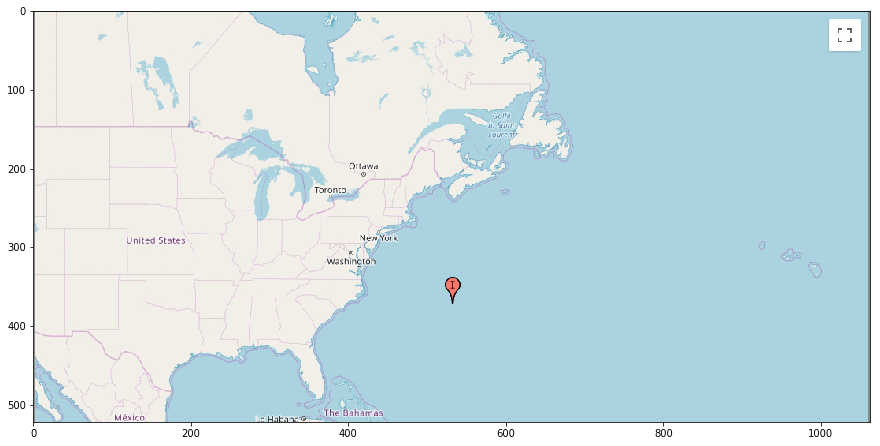

In [62]:
img = imread('pickup_lat_lowest point.jpg')
plt.figure(figsize = (15,10))
plt.imshow(img)
plt.show()

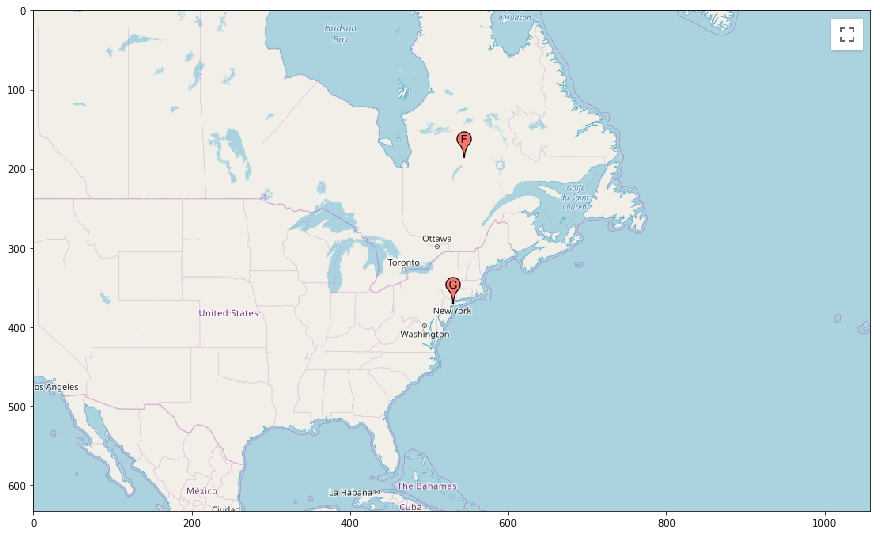

In [63]:
img = imread('pickup_lat_hightest point.jpg')
plt.figure(figsize = (15,10))
plt.imshow(img)
plt.show()

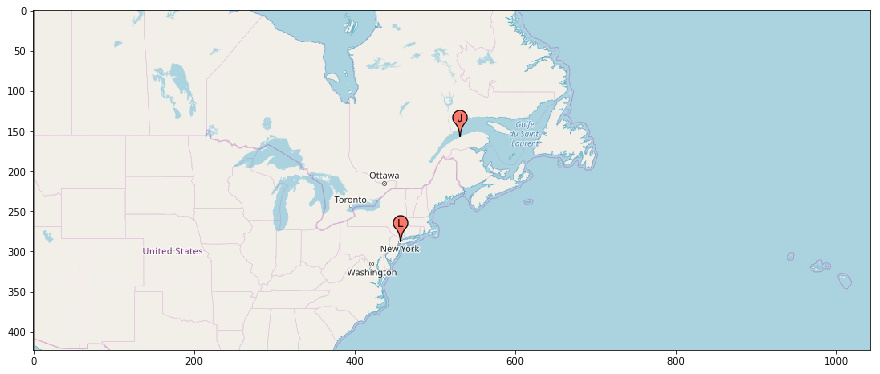

In [64]:
img = imread('dropoff_lat_hightest point.jpg')
plt.figure(figsize = (15,10))
plt.imshow(img)
plt.show()

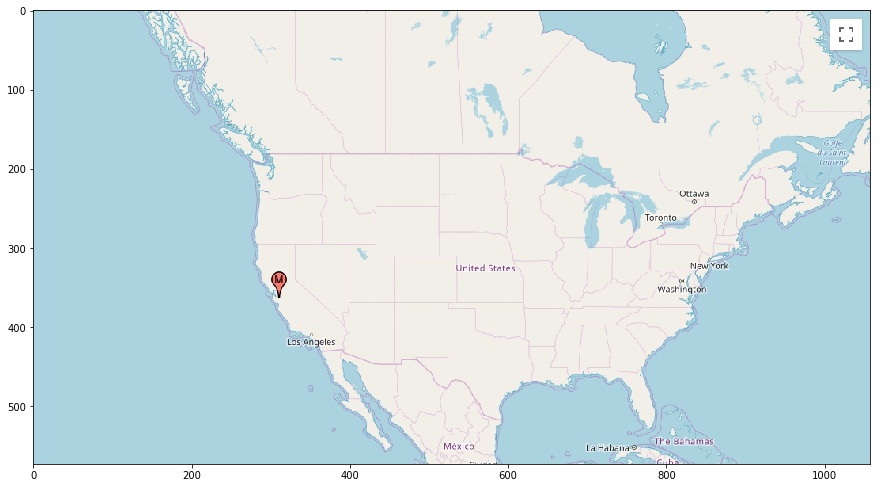

In [65]:
img = imread('dropoff_lon_lowest point.jpg')
plt.figure(figsize = (15,10))
plt.imshow(img)
plt.show()

## 뉴욕 택시이기 때문에 위도경도 좌표에 대한 전처리가 필요

### 뉴욕주

#### 위도 	40°29'40"N - 45°0'42"N( 40.494444 ~ 45.011667 )
#### 경도 	71°47'25"W - 79°45'54"W( 71.790278 ~ 79.765 )


### 뉴욕시(1)   40.664167   ,  -73.938611
### 뉴욕시(2)   40.71250     ,  -740.00000
### 뉴욕시(3)   40.6643       ,  -73.9385  
### 뉴욕시(4)   40.7569545 ,  -73.990494

## ※ dynamic_nc 좌표

#### https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation
#### 이 분석에 사용된 좌표를 지도에 표시해보았다.

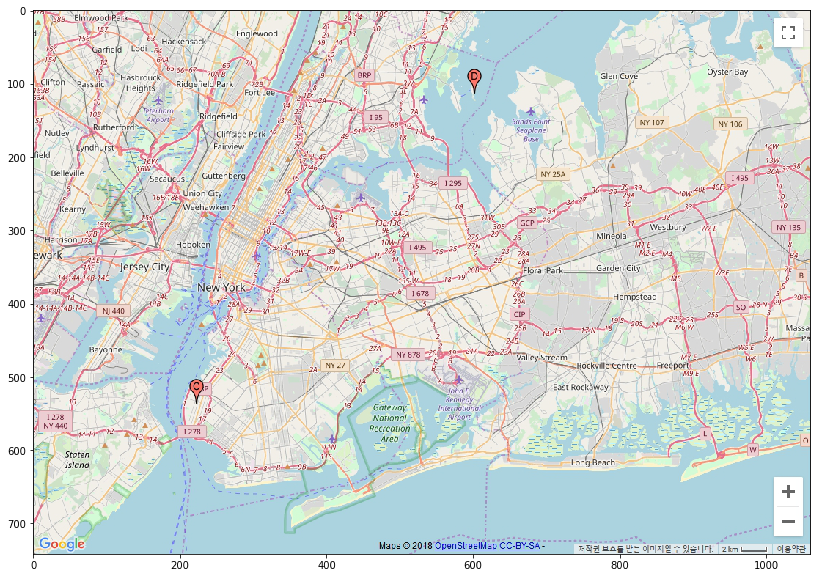

In [66]:
img = imread('dynamics_nc.jpg')
plt.figure(figsize = (15,10))
plt.imshow(img)
plt.show()

#### 범위를 어느 정도 해야하는지 생각해야함

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

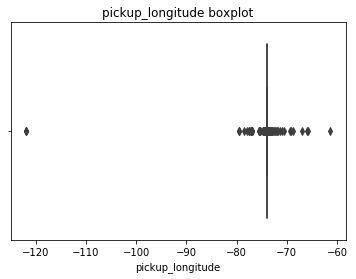

In [19]:
sns.boxplot('pickup_longitude', data = all)
plt.title('pickup_longitude boxplot')
plt.show()